<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/NLP_SVD_NMF_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [0]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [0]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [0]:
print("\n".join(newsgroups_train.data[4:5]))

AW&ST  had a brief blurb on a Manned Lunar Exploration confernce
May 7th  at Crystal City Virginia, under the auspices of AIAA.

Does anyone know more about this?  How much, to attend????

Anyone want to go?


In [0]:
np.array(categories)[newsgroups_train.target[4:5]]

array(['comp.graphics'], dtype='<U18')

In [0]:
from sklearn.feature_extraction import stop_words

list(stop_words.ENGLISH_STOP_WORDS)[20:30]

['but',
 'by',
 'alone',
 'couldnt',
 'empty',
 'serious',
 'through',
 'whereby',
 'between',
 'during']

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk import stem

wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [0]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [0]:
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [0]:
[porter.stem(w) for w in word_list ]

['feet', 'foot', 'foot', 'foot']

In [0]:
!pip install -U spacy

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.1.4)


In [0]:
!spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [0]:
import spacy

In [0]:
from spacy.lemmatizer import Lemmatizer
lemmatizer = Lemmatizer()

In [0]:
[lemmatizer.lookup(word) for word in word_list]

['feet', 'foot', 'foots', 'footing']

In [0]:
nlp = spacy.load("en_core_web_sm")

In [0]:
list(nlp.Defaults.stop_words)[:20]

['are',
 'because',
 'after',
 'four',
 'however',
 'noone',
 'ours',
 'to',
 'becoming',
 'except',
 'will',
 'out',
 'third',
 'hence',
 'was',
 'with',
 'ourselves',
 'why',
 'i',
 'but']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk import word_tokenize

class LemmaTokenizer():
  def __init__(self):
    self.wnl = nltk.stem.WordNetLemmatizer()
    
  def __call__(self, doc):
    return [ self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [0]:
# produce junk
#vectorizer = CountVectorizer(stop_words=stop_words.ENGLISH_STOP_WORDS, tokenizer=LemmaTokenizer())

In [0]:
vectorizer = CountVectorizer(stop_words=stop_words.ENGLISH_STOP_WORDS)

In [0]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()

In [0]:
vectors.shape

(2034, 26576)

In [0]:
vocab = np.array(vectorizer.get_feature_names())

In [0]:
vocab[10:20]

array(['0004136', '0004246', '0004422', '00044513', '0004847546', '0005',
       '0007', '00090711', '000usd', '0012'], dtype='<U80')

SVD

Expect that the words that appear most frequently in one topic would appear less frequently in the other - otherwise that word wouldn't make a good choice to separate out the two topics. Therefore, we expect the topics to be orthogonal.


The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows with diagonal matrix relative importance of each factor

In [0]:
# Apply SVD
U, s, Vh = linalg.svd(vectors, full_matrices=False)

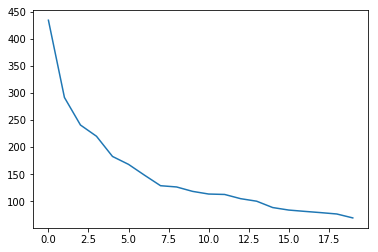

In [0]:
plt.plot(s[:20])

In [0]:
U.shape, s.shape, Vh.shape

((2034, 2034), (2034,), (2034, 26576))

In [0]:
Vh[110:120]

array([[ 0.06195362, -0.0133129 ,  0.00010634, ..., -0.00036447,
        -0.00072894, -0.00060114],
       [-0.0183849 ,  0.01551407, -0.00137196, ...,  0.00049748,
         0.00099496, -0.00055732],
       [-0.03944075,  0.00965763, -0.00001148, ...,  0.00013078,
         0.00026157,  0.00010548],
       ...,
       [-0.02445105,  0.01255032,  0.00005113, ...,  0.00023782,
         0.00047565, -0.00006506],
       [ 0.0145027 ,  0.02105853, -0.00201185, ..., -0.00003441,
        -0.00006882,  0.00014443],
       [-0.02001114, -0.00661361,  0.00291064, ...,  0.00006435,
         0.0001287 , -0.00001464]])

In [0]:
num_words = 8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [0]:
show_topics(Vh[10:20])

['larson theory universe physical den p2 p3 p1',
 'den p2 p3 p1 radius p12 p23 p13',
 'judas hanging reply db mr decenso greek death',
 'atheists atheism religious people religion prophecy matthew messiah',
 'space graphics people like sgi research package society',
 'telescope word national observatory satellite atheists infrared prefix',
 'people like nasa don think just time gay',
 'ra space atheists religious belief atheism edu larson',
 'space posting list sci posts response subject god',
 'astronaut program pilot nasa candidates mission military degree']

NMF

Rather than constraining our factors to be orthogonal, another idea would to constrain them to be non-negative. NMF is a factorization of a non-negative data set $V$ into non-negative matrices $W,\; H$. Often positive factors will be more easily interpretable (and this is the reason behind NMF's popularity).

$V$ = $W, \; H$


Nonnegative matrix factorization (NMF) is a non-exact factorization that factors into one skinny positive matrix and one short positive matrix.

In [0]:
from sklearn.decomposition import NMF

In [0]:
clf = NMF(n_components=5, random_state=42)

W = clf.fit_transform(vectors)
H = clf.components_

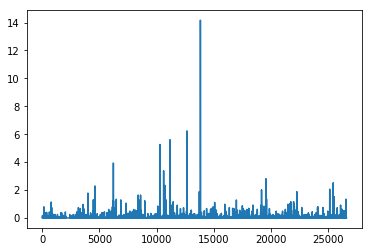

In [0]:
plt.plot(clf.components_[0])

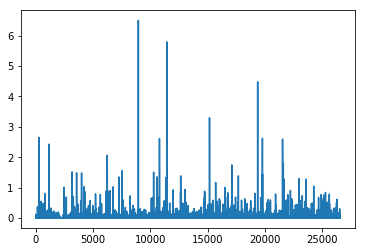

In [0]:
plt.plot(clf.components_[1])

In [0]:
show_topics(H)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

TFIDF

TF = ( #  of occurences of term t in a document ) / ( Total Number of words in document)

IDF = log ( Total number of documents / # Number of documents with t term )

In [0]:
# Applying TFIDF
vectorizer_tidf = TfidfVectorizer(stop_words=stop_words.ENGLISH_STOP_WORDS)

vector_tfidf = vectorizer_tidf.fit_transform(newsgroups_train.data)

In [0]:
W_tfidf = clf.fit_transform(vector_tfidf)
H_tfidf = clf.components_

In [0]:
show_topics(H_tfidf)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

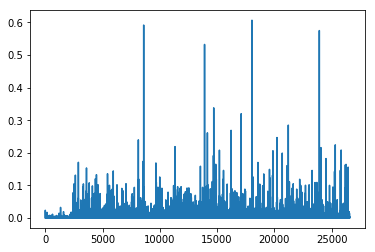

In [0]:
plt.plot(clf.components_[0])